## Training process

![featureextraction_p.svg](kuvat/featureextraction_p.svg)

### Mathematical notation
Task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$


 * The purpose of the supervised machine learning is the teach an algorithm to repeat the prediction of values $y_i$ carried out by a reference method. 
 * This is useful if the reference method is more expensive, slower or it has other problems
 * Often the reference method is a human observer, and it can be replaced with an algorithm
 * If the predicted value $y_i$ is categorical, the method is called classification, because it assigns samples in classes
 * If the predicted value $y_i$ is continuous variable, the method is called as regression. 
 * There are many methods for implementing both classification and regression
 * Variable $y$ is called as dependent variable and $x$ as independent variable, since the values of $y$ depend on $y$.

## Measures for regression model fitting

Terms used below
 * $x_i$: The i:th feature vector
 * $y_i$: The i:th true value of predicted variable
 * $\hat{y}_i = f(x_i)$: The predicted $y$-value
 * $\overline{y}$: The mean value of $y_i$
 * $n$: The number of samples in the training data set
 
 In the code `yh` = $\hat{y}$
 

### Root mean square value of error: (RMSE)

RMSE is the RMS average of the prediction error (residual). RMSE is an absolute mesure, which is not scaled in any range. The unit of the error is the same as the unit of $y$.

$$\rm{RMSE}=\sqrt{\frac{\sum_{i=0}^{n}(y_i - f(x_{i}))^2}{n}}$$

This error metrics emphasise large deviations from the true value. It can be calculated using the `mean_squared_error()`-function from `sklearn.metrics`.

`from sklearn.metrics import mean_squared_error
 RMSE=mean_squared_error(y,yh)`
 

### Mean absolute error (MAE)

MAE is the average of the absoluve value of the prediction error (residual). MAE is an absolute mesure, which is not scaled in any range. The unit of the error is the same as the unit of $y$.

$$\rm{MAE}=\frac{\sum_{i=0}^{n} |y_i - f(x_{i})| }{n}$$

Coefficient of determination is the proportion of the variance of the residual divided by the original variance of the data. 

`from sklearn.metrics import mean_absolute_error
 MAE=mean_absolute_error(y,yh)`
 
 

### Coefficient of determination ($R^2$)
Coefficient of determination, also called as R-squared, measures the ratio of variance of the residual (zero mean of residual assumed) and the variance of the original data. $R^2$ is always smaller than one. The interpretation of $R^2$ is that it shows how large fraction of the variance in dependent variable is accounted for by the model. In the perfect case, the prediction is exactly same as $y$, the variance of the residual is zero, and $R^2=1$.

$$ R^2 = 1- \frac{\sum_{i=0}^{n}(y_i - f(x_{i}))^2}{\sum_{i=0}^{n}(y_i - \overline{y}))^2}$$

Coefficient of determination is often handy, because it is relative and does not depend on the absolute values of $y$. When the absolute error is also important, then RMSE and MAE may be calculated in addition to $R^2$.

`from sklearn.metrics import r2_score
 R2=r2_score(y,yh)`
 

 
 ## Measures for classification model fitting
 
### Precision of classification (P)

The `accuracy_score()`-function returns the fraction of correctly classified samples 

$$ P = \frac{n_\rm{correct}}{n}$$


 `from sklearn.metrics import accuracy_score
 s=accuracy_score(y, yh)`
 

 
 ### Cohen's Kappa ($\kappa$)
 
Cohen's kappa is a score which expresses the level of agreement between two annotators in a classification problem.  It is generally thought to be a more robust measure than precision, as κ takes into account the possibility of the agreement occurring by chance. 

Cohen's Kappa is calculated using the above mentioned precision, $p_o$, and the hypothetical probability of chance agreement, $p_e$. Read more from [Cohen's Kappa in Wikipedia](https://en.wikipedia.org/wiki/Cohen%27s_kappa).
 
 $$ \kappa = \frac{p_o - p_e}{1 - p_e} $$
 
 `from sklearn.metrics import cohen_kappa_score(x,y)
 s=cohen_kappa_score(y, yh)`
 

## Overfitting

Two essential properties of a good model are that 
1. It *fits to the training data*, i.e. the model can predict the dependent variable from the independent variables. The measures for the fitness are for example $R^2$ or precision.
1. It *can generalize*, i.e. the model can predict dependent variables also for new data, which is not seen yet

Usually a model can be fitted to the data better, by increasing it's complexity, i.e. adding more degress of freedom into the model. But because all practical data also contains noise, the danger is that when the complexity of the model increases, it can also model the noise in the data in addition to actual phenomenan. 

When the model is fitted to the data, it is really important to carefully choose correct complexity for the model. If the model is too complex ( it has too many degrees of freedom) it has possibility to model also the noise included in the data. In this kind of case, the model fits very well in  the training data set, but it's capabilities of predicting new data not yet seen can be week. 

### Example

Lets create a data set by combining a simple second order polynomial with some random data source:

$$ y = 2x^2 + \mathcal{N}(0,6)$$

Then a second order spline is fitted to the data with two different regularization parameter (smoothness). Consequently the first model is split to 16 pieces (with 17 knots), and the second order spline is fit to each piece separately, whereas the second model is split only in one piece (with 2 knots). Which one is better?

Text(0.5, 1.0, 'B) Number of knots = 2')

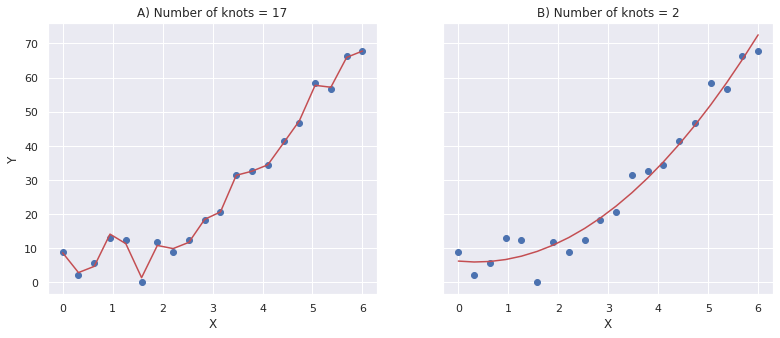

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import UnivariateSpline
from scipy.stats import norm
sns.set()

N=20
x=np.linspace(0,6,N)
y=2*x**2 + norm.rvs(0,5,N,random_state=0)

fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharey=True)

spl1=UnivariateSpline(x, y, k=2, s=0.5*N)
np1=len(spl1.get_knots())
ax[0].scatter(x,y, c='b')
ax[0].plot(x,spl1(x), 'r')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('A) Number of knots = %d' % (np1))

spl2=UnivariateSpline(x, y, k=2, s=20*N)
np2=len(spl2.get_knots())
ax[1].scatter(x,y, c='b')
ax[1].plot(x,spl2(x), 'r')
ax[1].set_xlabel('X')
ax[1].set_title('B) Number of knots = %d' % (np2))

The first model fits better to the current data, but the second model is still better, because if new data is drawn using the same process, the second model will fit better.

#### Try it

In [9]:
# Use R2 score to measure the fitness
from sklearn.metrics import r2_score

# Create new data from the same model
y2=2*x**2 + norm.rvs(0,5,N,random_state=1)

# Score the original (training set)
r2_m1_train=r2_score(y,spl1(x))
r2_m2_train=r2_score(y,spl2(x))

# Score the second (testing set)
r2_m1_test=r2_score(y2,spl1(x))
r2_m2_test=r2_score(y2,spl2(x))

print("Training set, model 1 and model 2.......%3.2f, %3.2f" % (r2_m1_train, r2_m2_train))
print(" Testing set, model 1 and model 2.......%3.2f, %3.2f" % (r2_m1_test, r2_m2_test))

Training set, model 1 and model 2.......1.00, 0.97
 Testing set, model 1 and model 2.......0.90, 0.92


The first model is said to be **overfitted** to the data. It fits very well to the training data, but cannot effectively generalize to the new data.

## Training, Validation and Testing <a class="anchor" id="TrainTestValidate"></a>

Building predictive models requires following stages
1. Model building (training)
1. Model validation (often within an interation/optimisation loop)
1. Model testing (in the end)

Important rules related to model building and testing
1. The model cannot be tested using training set, because that would lead to overfitting
1. Test set may not bet used many times, because then you would overfit to the test data

Each stage requires data. The original data can be split in three different sets, one for each stage, but high quality labeled data is usually scarce resource, and in that cases slightly smarter method of using the data is needed.

### Cross Validation <a class="anchor" id="crossvalidation"></a>

![crossvalidation.svg](kuvat/crossvalidation.png "Crossvalidation")

 - Cross validation is an important technique to utilize the data more efficiently for all supervised training purposes
 - With cross validation, the training set is divided in N-folds.
 - At first (N-1) folds are used for training and 1 fold for validation
 - The process is repeated N times, until every sample has participated in training and validation sets
 - The final score is the average of all N scores